In [1]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans,SpectralClustering,DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import calmap
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [2]:
p = "pickles/alliance_sub.p"

In [3]:
df_merged = pd.read_pickle(p)

In [4]:
df_merged.head()

,Unnamed: 0,d,t,date_x,no2,o3,no,so2,temp,humidity,...,date_y,nsec,altm_(hpa),temp (degree_c),dew (degree_c),rh_(percentage),dir_(degrees),spd_(m/s),vis (km),clouds (====)
0,10936,06/05/2016,22:00:10,2016-05-07 00:00:00,7,-7,-22,41,16.64,85.37,...,2016-05-06 22:00:00,3671550000,1023.0,19,18,94,320,3,10.0,FEW018
1,10966,06/05/2016,22:30:10,2016-05-07 00:30:00,5,-5,-22,45,16.64,84.88,...,2016-05-06 22:30:00,3671551800,1023.0,19,17,88,350,2,10.0,FEW018
2,10996,06/05/2016,23:00:10,2016-05-07 01:00:00,2,-2,-23,45,16.70,84.57,...,2016-05-06 23:00:00,3671553600,1023.0,18,17,94,30,3,10.0,FEW018
3,11026,06/05/2016,23:30:10,2016-05-07 01:30:00,2,-2,-22,46,16.62,85.15,...,2016-05-06 23:30:00,3671555400,1024.0,18,17,94,10,3,10.0,FEW018
4,11082,07/05/2016,00:29:53,2016-05-07 02:29:00,0,0,-23,45,16.74,85.37,...,2016-05-07 00:30:00,3671559000,1024.0,18,17,94,20,2,10.0,FEW018


In [5]:
features = ['d0', 'd1', 'd2', 'd3', 'd4','d5', 'd6', 'd7',\
            'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15']

In [6]:
points = ['dir_(degrees)', 'spd_(m/s)']

In [7]:
X = df_merged[features].as_matrix()
Y = df_merged[points]

In [8]:
#Performing PCA on our Data
pca_components = 2

data = X
pca_performed = False

# pca = PCA(n_components=pca_components)
# data = pca.fit_transform(X)
# pca_performed = True

pca = KernelPCA(n_components=pca_components, kernel='rbf')
data = pca.fit_transform(X)
pca_performed = True

In [9]:
#Performing Clustering on Data

n_clusters = 4

kmeans = KMeans(init='random', n_clusters=n_clusters, n_init=10)
labels = kmeans.fit_predict(data)

# agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
# labels = agglomerative.fit_predict(data)

# gaussian = GaussianMixture(n_components=n_clusters)
# gaussian.fit(data)
# labels = gaussian.predict(data)

# db = DBSCAN(eps=100, min_samples=10).fit(data)
# labels = db.labels_
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)


In [10]:
labels_ = pd.Series(labels)
df_merged["labels"] = labels_
df_merged.to_pickle("something.p")
df_merged["labels"].value_counts()

2    4102
0    1001
3     742
1     425
Name: labels, dtype: int64

In [11]:
#Joining cluster labels to wind data

labels_ = pd.DataFrame({"labels": labels})
df = Y.join(labels_)
df = df[df['labels']!= -1]
Y_joined = np.array(df)

In [12]:
assign_colors = True

colors = ['r','b','g','c','m','y','k','brown']
c_assign = [colors[x[2]] for x in Y_joined]

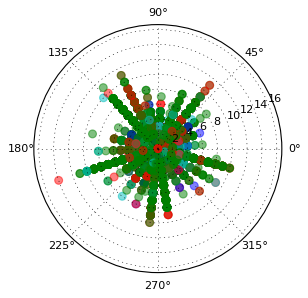

In [13]:
if assign_colors:
    c = c_assign
else:
    c = Y_joined[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(Y_joined[:,0], Y_joined[:,1], c=c, edgecolors='face', s=50, cmap='hsv', alpha=.5)
plt.show()

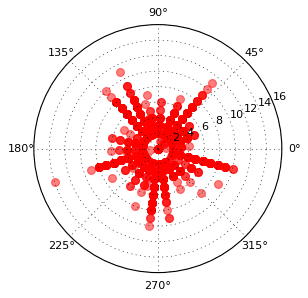

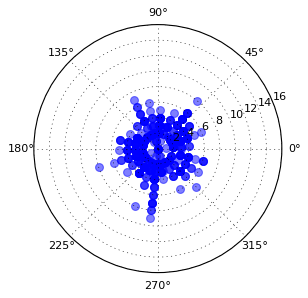

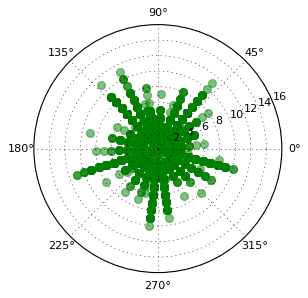

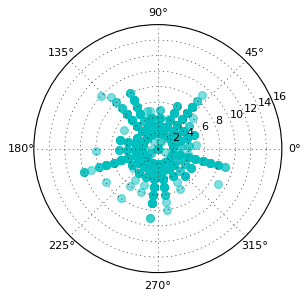

In [14]:
for i in range(n_clusters):
    val = Y_joined[Y_joined[:,2]==i]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    if assign_colors:
        c = colors[i]
    else:
        c = val[:,2]
    ax.set_rlim(0,16)
    c = ax.scatter(val[:,0], val[:,1], color=c, edgecolors='face', s=50, cmap='hsv', alpha=.5)
plt.show()

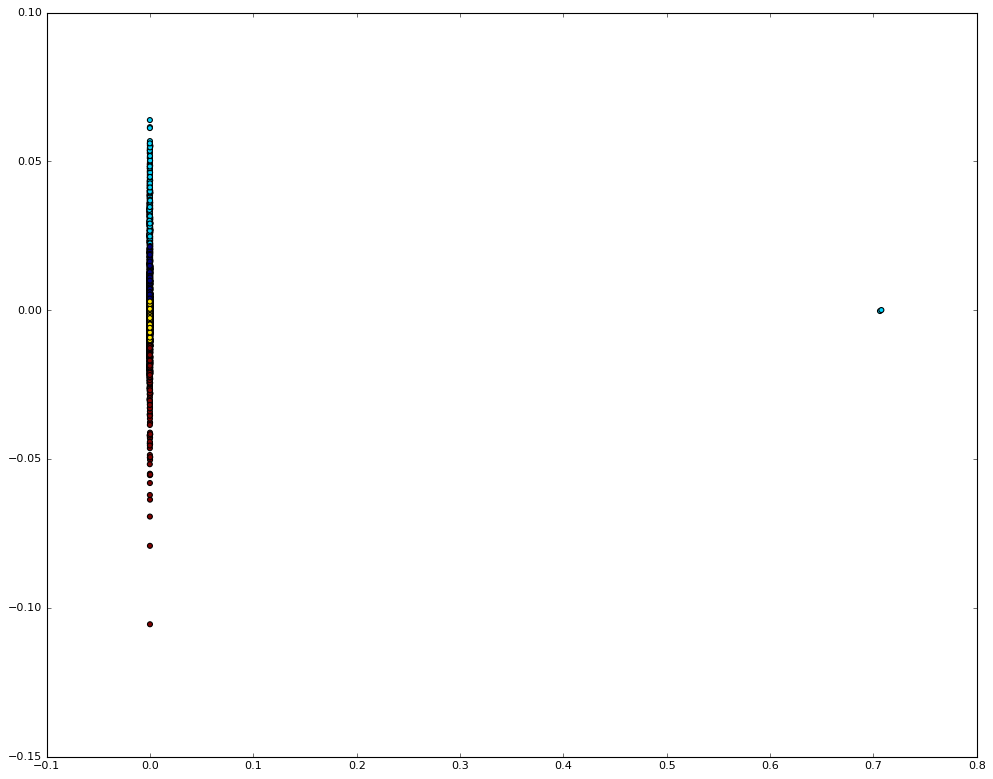

In [15]:
if pca_performed and pca_components <= 2:
    plt.figure(3,figsize=(15,12))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.show()

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1


In [17]:
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

In [18]:

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.03     # point in the mesh [x_min, x_max]x[y_min, y_max].
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [19]:
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])


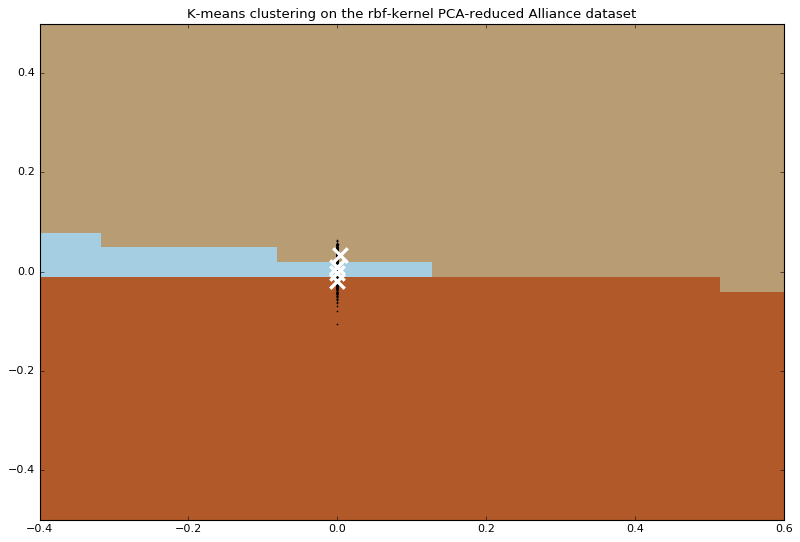

In [ ]:

Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the rbf-kernel PCA-reduced Alliance dataset')
plt.xlim(-0.4, 0.6)
plt.ylim(-0.5, 0.5)
#plt.xticks(())
#plt.yticks(())
plt.show()

In [ ]:
#Evaluating performance of clustering under different settings

kernel_fits = []
cluster_settings = range(2, 101)
num_trails = 10
data = X

for setting in cluster_settings:
    total_score = 0
    for _ in range(num_trails):
        kmeans = KMeans(init='random', n_clusters=setting, n_init=10)
        labels = kmeans.fit_predict(data)
        total_score += metrics.calinski_harabaz_score(data, labels)
    kernel_fits.append((setting, total_score / num_trails))
    
for (setting, score) in kernel_fits:
    print ("Average score for {} clusters: {}".format(setting, score))

In [ ]:
db = DBSCAN(eps=0.02, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


In [ ]:
n_clusters_

In [ ]:
# Black removed and is used for noise instead.
plt.figure(1,figsize=(12,8))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)


plt.xlim(-0.4, 0.5)
plt.ylim(-0.25, 0.35)
plt.title('DBSCAN Estimated number of clusters: %d' % n_clusters_)
plt.show()